# Projet

Pour rappel, cet examen est à réaliser par groupes d'au plus trois étudiants.

Vous devez télécharger et utiliser le jeu de données suivant : MP-4MLSP.csv (source : kaggle).

Il contient les résultats d'une enquête de satisfaction menée auprès des clients d'une compagnie aérienne.

Voici la signification des différentes variables :

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level (satisfied, neutral, dissatisfied)
- Price: the flight price
-
Votre rendu se fera sous la forme d'un Notebook Python (code source et export au format PDF ou HTML).

Tous les graphiques, calculs, transformations, implémentations d'algorithmes, etc. devront être introduits, justifiés et interprétés. Une rédaction professionnelle est attendue. Elle constituera une part non négligeable du barème.

Le but de ce projet est d'effectuer des prévisions sur les variables 'Satisfaction' et 'Price".

1. Mener de façon complète une analyse exploratoire des données : graphiques, paramètres, tests, etc.
2. Classification sur la variable "Satisfaction" :
a Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible.
b- Prétraiter les données : choisir les variables explicatives (essayer plusieurs sélections), procéder à l'imputation des valeurs manquantes (tester plusieurs stratégies), normaliser les variables, etc.
c- Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, établissement de la matrice de confusion, calculs des différentes métriques (exactitude, précision, rappel, F1 score, auc, etc.).
d- Comparer les différents algorithmes.
3. Classification sur une variable dérivée de la variable "Satisfaction" :
a- Créer une variable binaire à partir la variable "Satisfaction" : on regroupera les observations des classes "Neutral" et "dissatisfied" en une seule classe.
b- Reprendre les étapes de la question 2 avec cette nouvelle variable comme variable cible.
4. Régression sur la variable "Price" :
a- Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible.
b- Prétraiter les données : choisir les variables explicatives (essayer plusieurs sélections), procéder à l'imputation des valeurs manquantes (tester plusieurs stratégies), normaliser les variables, etc.
c- Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, calculs des différentes métriques (MSE, MAE, etc.).
d- Comparer les différents algorithmes.

In [451]:
# Imports

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
import seaborn as sns
import joblib
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Chargement du dataset

df = pd.read_csv("project.csv")

## 1. Mener de façon complète une analyse exploratoire des données : graphiques, paramètres, tests, etc.

In [452]:
# Informations générales

# print("Premières observations du dataframe")
# print(df.head())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nNombre d'observations et de variables")
# print(df.shape)
# print("\n\n------------------------------------------------------------------------")
# print("\n\nTypes des variables")
# print(df.dtypes)
# print("\n\n------------------------------------------------------------------------")
# print("\n\nValeurs manquantes (nulles)")
# print(df.isnull().sum())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nValeurs manquantes (na)")
# print(df.isnull().sum())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nCalculs de base")
# print(df.describe())
# print("\n\n------------------------------------------------------------------------")
# print("\n\nInformations de base sur le dataset")
# print(df.info())

In [453]:
## Aperçu du dataframe
# df

# # Liste des valeurs possibles pour une colonne/variable donnée
# valeurs_uniques = df['satisfaction'].unique()
# print(valeurs_uniques)

# Décompte pour chaque valeur
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n") 

Value counts for Unnamed: 0:
Unnamed: 0
0         1
86582     1
86595     1
86594     1
86593     1
         ..
43288     1
43287     1
43286     1
43285     1
129879    1
Name: count, Length: 129880, dtype: int64


Value counts for id:
id
19149     1
72985     1
80411     1
62755     1
60919     1
         ..
112882    1
38526     1
110162    1
111763    1
75820     1
Name: count, Length: 129880, dtype: int64


Value counts for Gender:
Gender
Female    65899
Male      63981
Name: count, dtype: int64


Value counts for Customer Type:
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64


Value counts for Age:
Age
22.0    6342
40.0    6039
32.0    5260
50.0    4642
35.0    3687
        ... 
66.0      67
67.0      61
71.0      52
70.0      44
76.0      25
Name: count, Length: 68, dtype: int64


Value counts for Type of Travel:
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64


Value counts for Class:
Cla

### Typer les variables

- Gender: Gender of the passengers (Female, Male) - bin
- Customer Type: The customer type (Loyal customer, disloyal customer) - bin
- Age: The actual age of the passengers - num
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel) - bin
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus) - ord
- Flight distance: The flight distance of this journey - num
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) - ord / 0 à traiter à part
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient - ord (0 à 5)
- Ease of Online booking: Satisfaction level of online booking - ord
- Gate location: Satisfaction level of Gate location - ord (0 - 5)
- Food and drink: Satisfaction level of Food and drink - ord (0 - 5)
- Online boarding: Satisfaction level of online boarding - ord (0 - 5)
- Seat comfort: Satisfaction level of Seat comfort - ord (0 - 5)
- Inflight entertainment: Satisfaction level of inflight entertainment - ord (0 - 5)
- On-board service: Satisfaction level of On-board service - ord (0 - 5)
- Leg room service: Satisfaction level of Leg room service - ord (0 - 5)
- Baggage handling: Satisfaction level of baggage handling - ord (0 - 5)
- Checkin service: Satisfaction level of Check-in service - ord (0 - 5)
- Inflight service: Satisfaction level of inflight service - ord (0 - 5)
- Cleanliness: Satisfaction level of Cleanliness - ord (0 - 5)
- Departure Delay in Minutes: Minutes delayed when departure - num
- Arrival Delay in Minutes: Minutes delayed when Arrival -num
- Satisfaction: Airline satisfaction level (satisfied, neutral, dissatisfied) - cat ['dissatisfied' 'satisfied' 'neutral']
- Price: the flight price - num

In [454]:
variables_to_remove = ["Unnamed: 0", "id"]
bin_variables = ["Gender", "Customer Type", "Type of Travel" ]

targets= ["satisfaction", "Price"]

# Test 1 : échelles de satisfaction avec 0 = absence du service (gênant car n'entre pas vraiment dans l'évaluation, puisque absence du service)
# num_variables = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
# ord_variables = ["Class", "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "Cleanliness" ]

# Test 2: échelles de staisfaction perçues comme des nombres
num_variables = ["Leg room service", "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "Cleanliness"]
ord_variables = ["Class"]

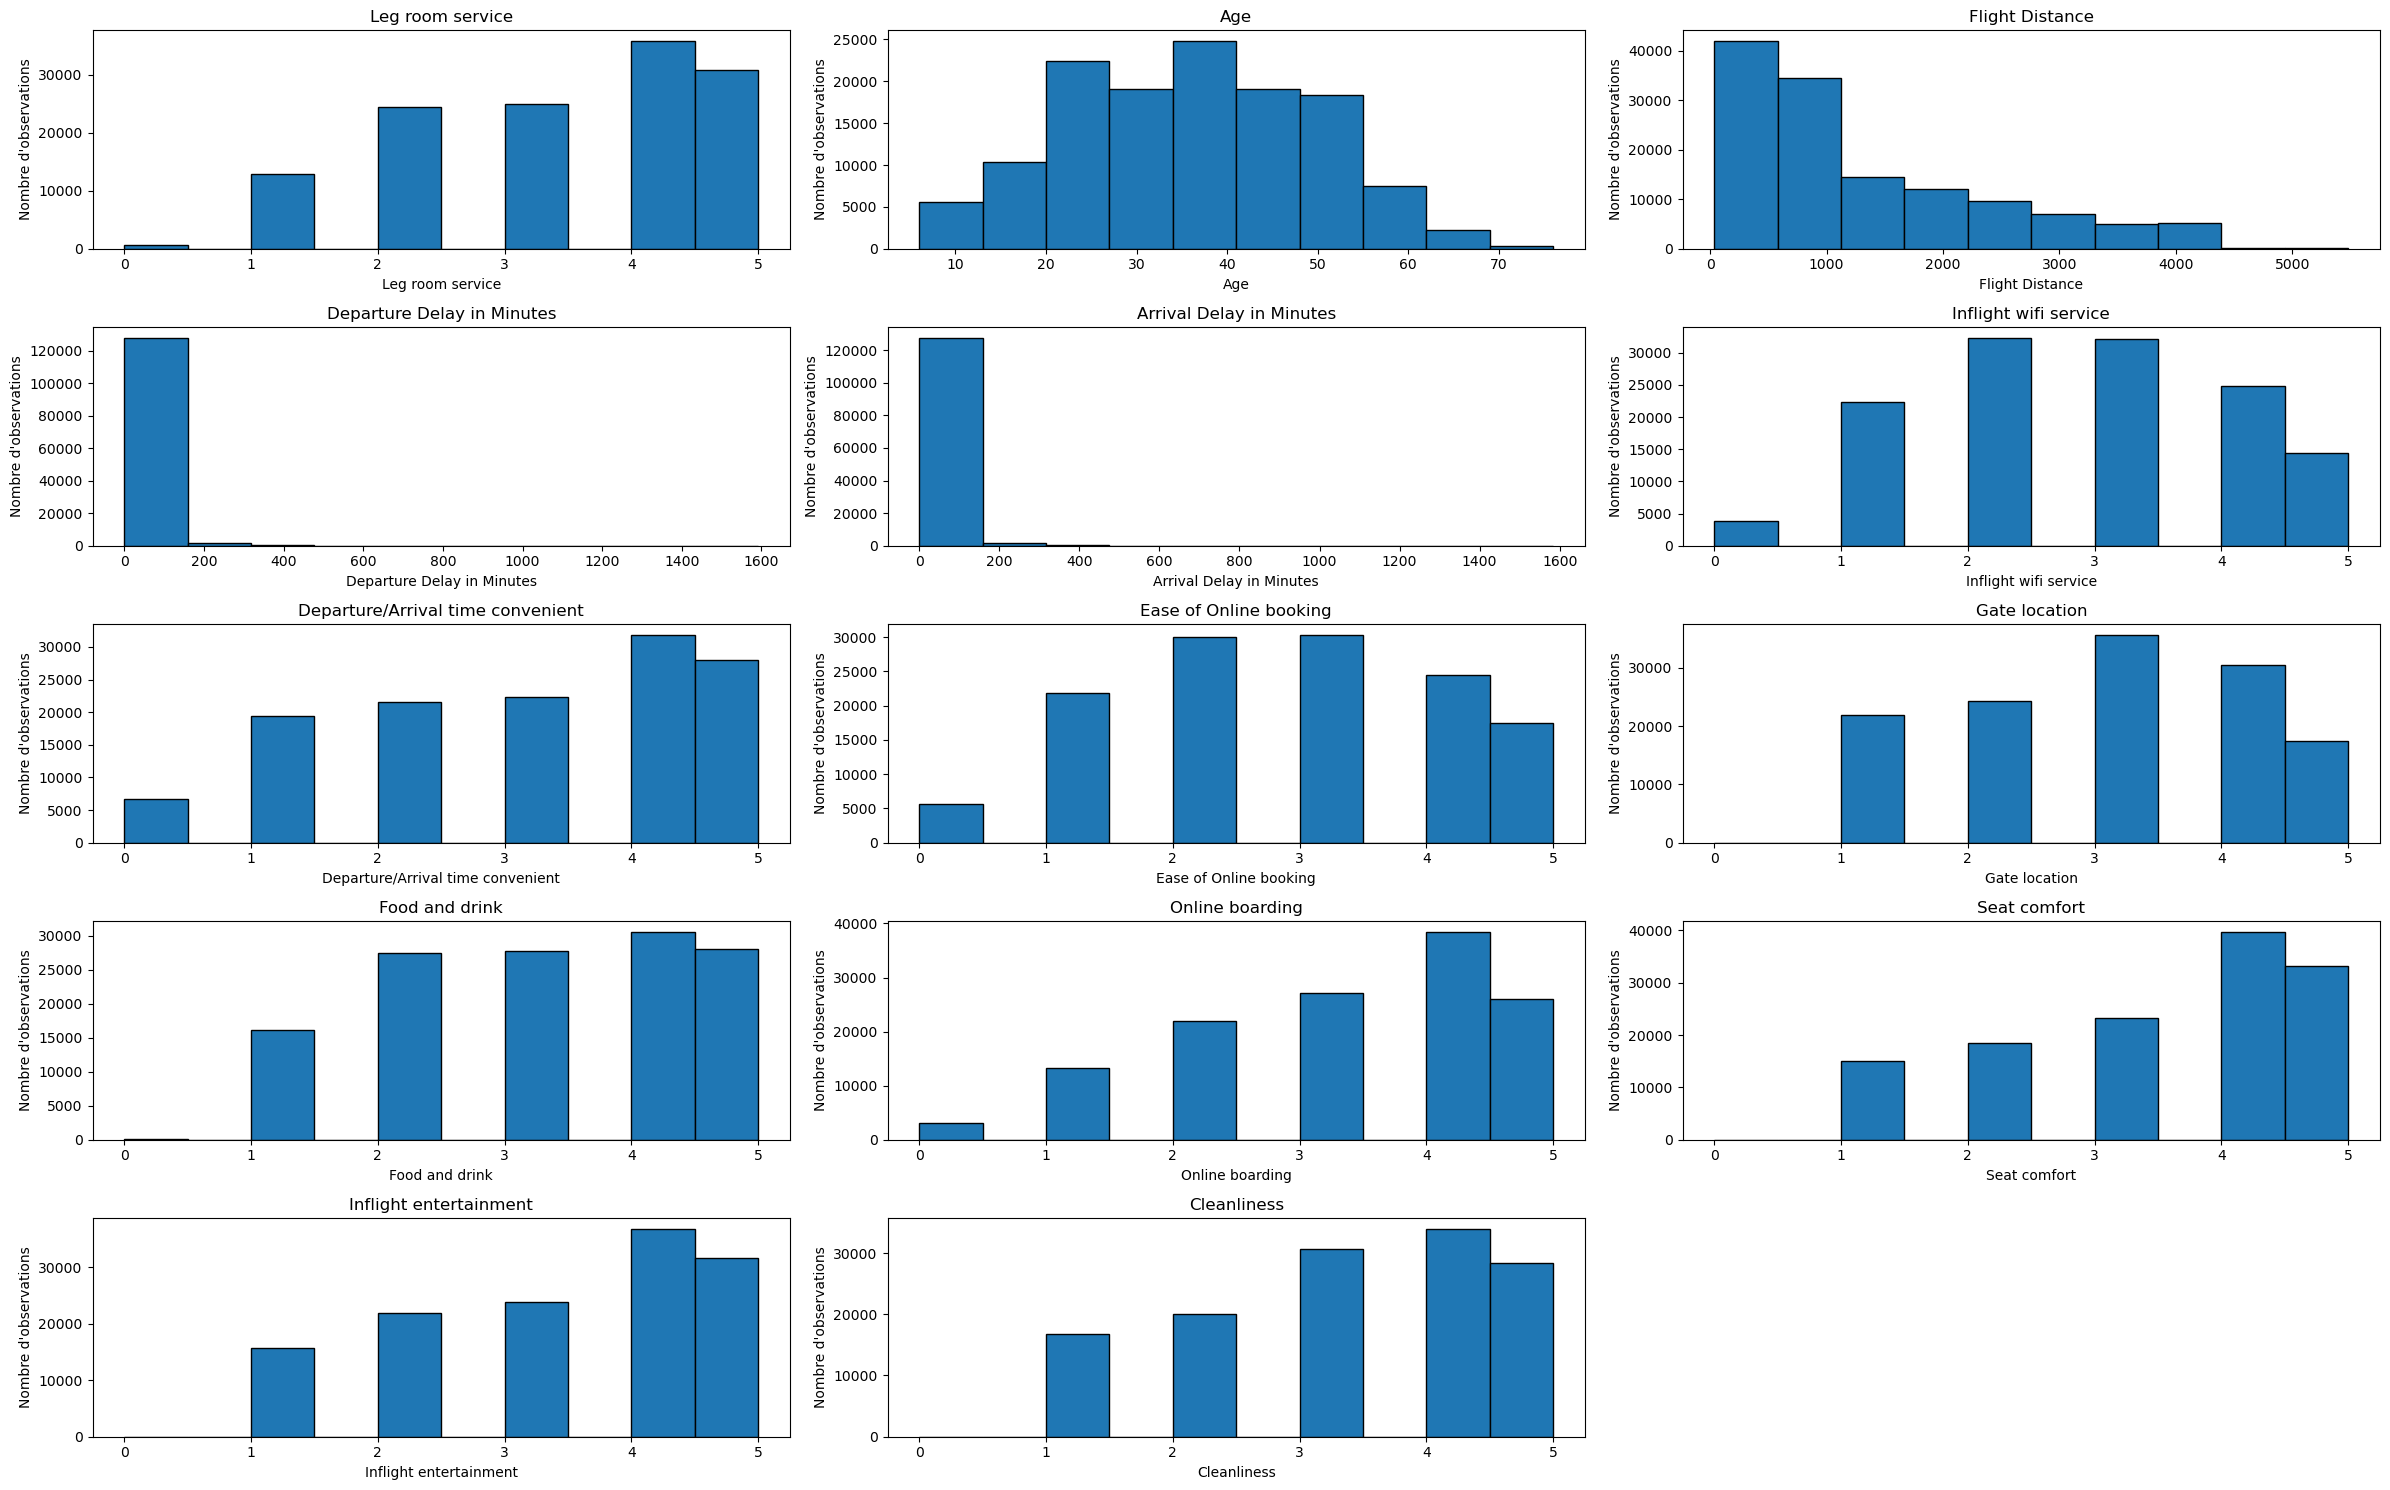

In [455]:
n_cols = 3
n_rows = (len(num_variables) + n_cols - 1) // n_cols  # Arrondir à l'entier supérieur

plt.figure(figsize=(8 * n_cols, 3 * n_rows))  # Ajuster la taille globale de la figure

for i, col in enumerate(num_variables):
    plt.subplot(n_rows, n_cols, i + 1)  # Créer un sous-graphique dans une grille
    plt.hist(df[col], edgecolor="black") #, bins=100)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")

plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour qu'ils ne se chevauchent pas
plt.show()

In [456]:
gauss_variables = ["Age", "Inflight wifi service", "Ease of Online booking", "Gate location", "Online boarding", "Seat comfort", "Cleanliness", "Leg room service"]
no_gauss_variables = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Departure/Arrival time convenient", "Food and drink", "Inflight entertainment"]

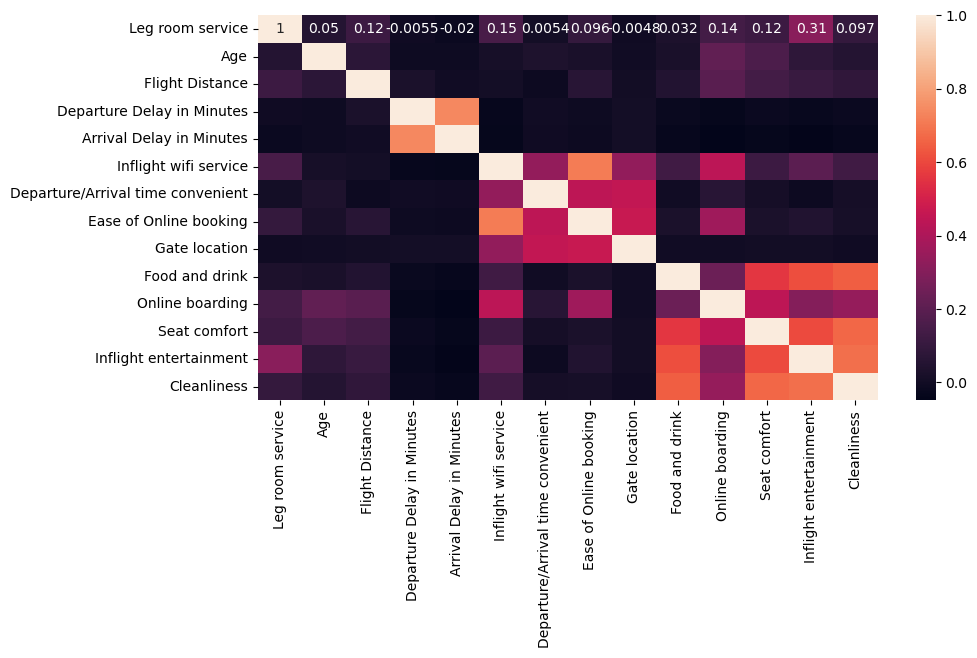

In [457]:
correlation_matrix = df[num_variables].corr(method='spearman')
plt.subplots(figsize=(10,5))
sns.heatmap(data = correlation_matrix, annot=True)
plt.show()

Variables qui semblent liées (ordre croissant):
- Cleanliness & Inflight entertainment
- Cleanliness & Seat comfort
- Cleanliness & Food and drink
- Ease of Online booking & Inflight wifi service
- **Departure Delay in Minutes & Arrival Delay in Minutes**

### Supprimer les colonnes inutiles
Variables contenues dans la liste variables_to_remove

In [458]:
df = df.drop(variables_to_remove, axis=1)

### Traiter les anomalies [NON FONCTIONNEL]

A FAIRE !!! gates = un seul zéro = on peut le supprimer

In [459]:
# ! A faire 
# Retirer les anomalies
class OutlierRemover(BaseEstimator, TransformerMixin):
  # X= toutes les columns du df

  #columns: col à prende en compte pour détecter les anomalies (il ne faut prendre que les variables numériques)
  def __init__(self, columns, factor = 1.5):
      self.columns = columns
      self.factor = factor
      self.kept_indices = None
      
  # Retire les anomalies pour les variables numériques
  def remove_outliers(self, X):
      indices_to_keep = X.index
      l = []
      for c in self.columns:
          Q1 = X[c].quantile(0.25)
          Q3 = X[c].quantile(0.75)
          delta = Q3-Q1
          lower_bound = Q1 - self.factor*delta
          upper_bound = Q3 + self.factor*delta
          condition = (X[c] >= lower_bound) & (X[c] <= upper_bound)
          #On met dans une liste les valeurs qui ne sont pas des anomalies
          column = X[c].loc[ condition ]
          l.append( pd.Series(column) )
          
      res = pd.concat(l, axis=1, join = "inner")

      self.kept_indices = res.index

      
      return X.loc[self.kept_indices]

  def fit(self, X, y=None):
      return self

  def transform(self, X):
      return self.remove_outliers(X)

outlier_pipeline = Pipeline(steps= [("outliers", OutlierRemover(columns= df.columns, factor = 1.5))])

### Création des datasets d'entrainement et de test

In [460]:
X = df.drop(targets, axis=1)

data_splits = {}

for target in targets:
    y = df[target]
    
    # Vérifier si la stratification est possible
    if y.nunique() > 1 and y.value_counts().min() > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=314)
    else:
        print(f"Stratification not possible for target {target}. Using non-stratified split.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=314)

    data_splits[f"{target}_X_test"] = X_test
    data_splits[f"{target}_X_train"] = X_train
    data_splits[f"{target}_y_train"] = y_train
    data_splits[f"{target}_y_test"] = y_test

    # print("🚀 ~ X_test:", data_splits[f"{target}_X_test"].shape)
    # print("🚀 ~ X_train:", data_splits[f"{target}_X_train"].shape)
    # print("🚀 ~ y_train:", data_splits[f"{target}_y_train"].shape)
    # print("🚀 ~ y_test:", data_splits[f"{target}_y_test"].shape)

### Formater les variables binaires
Comme elles ne sont pas sous la forme d'un boolean, on remplace chacune des 2 valeurs par 0 ou 1.

In [ ]:
def set_bin_num(df):
    # Création d'un nouveau DataFrame pour les résultats
    result = df.copy()
    conditions = [
        (df['Gender'] == "Male") | (df['Customer Type'] == "disloyal Customer") | (df['Type of Travel'] == "Personal Travel")
    ]
    # Utiliser np.select pour assigner 0 ou 1 selon les conditions
    result['Gender'] = np.select(conditions, [0], default=1)
    result['Customer Type'] = np.select(conditions, [0], default=1)
    result['Type of Travel'] = np.select(conditions, [0], default=1)
    
    return result[['Gender', 'Customer Type', 'Type of Travel']]


In [ ]:
from sklearn.pipeline import FunctionTransformer

bin_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", FunctionTransformer(set_bin_num, validate=False))
    ]
)

### Formater les variables ordinales

In [ ]:
# # Traitement particulier pour inflight_wifi_service
# df['Wifi Applicable'] = df['Inflight service'].apply(lambda x: 0 if x == 0 else 1)
# df['Inflight service'] = df['Inflight service'].replace(0, np.nan)

# # Ajout de la nouvelle colonne aux variables binaires
# bin_variables.append("Wifi Applicable")

In [ ]:
# Transforme les strings en nombres qui sont ordonnés entre eux
# class_pipeline = Pipeline(steps=[("encoder", OrdinalEncoder(categories=[["Eco", "Eco Plus", "Business"]]))])

ord_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("class_encoder", OrdinalEncoder(categories=[["Eco", "Eco Plus", "Business"]]))
])

In [ ]:
# Une des targets est ordinale = il faut la prétraiter
satisfaction_encoder = OrdinalEncoder(categories=[["dissatisfied", "neutral", "satisfied"]])

data_splits["satisfaction_y_train"] = pd.DataFrame(
    satisfaction_encoder.fit_transform(data_splits["satisfaction_y_train"].to_frame()),
    columns=["satisfaction"]
)

data_splits["satisfaction_y_test"] = pd.DataFrame(
    satisfaction_encoder.transform(data_splits["satisfaction_y_test"].to_frame()),
    columns=["satisfaction"]
)
# Affichage pour vérification
print(data_splits["satisfaction_y_train"].head)
print(data_splits["satisfaction_y_test"].head)

<bound method NDFrame.head of         satisfaction
0                2.0
1                2.0
2                1.0
3                0.0
4                1.0
...              ...
103899           1.0
103900           2.0
103901           1.0
103902           1.0
103903           2.0

[103904 rows x 1 columns]>
<bound method NDFrame.head of        satisfaction
0               1.0
1               2.0
2               0.0
3               2.0
4               1.0
...             ...
25971           1.0
25972           0.0
25973           2.0
25974           0.0
25975           2.0

[25976 rows x 1 columns]>


### Pour les variables numériques:
Si la variable ressemble à une gaussienne, on normalize en fonction du standard (on centre le haut de la courbe de Gauss), si ce n'est pas le cas, on normalise avec le min et le max
=> Voir si les variables numériques suivent une loi normale (courbe gaussienne)

In [ ]:
# Pour les variables numériques non gaussiennes
from sklearn.impute import KNNImputer


num_no_gauss_pipeline = Pipeline(steps=[
  ('imputer', KNNImputer()),
  ("scaler", MinMaxScaler())
])

In [ ]:
# Pour les variables numériques gaussiennes
num_gauss_pipeline = Pipeline(steps=[
  ('imputer', KNNImputer()),
  ("scaler", StandardScaler())
  ])

### Définition de la pipeline dans l'ordre

In [ ]:
preprocessor = ColumnTransformer(transformers= [
  ("ord", ord_pipeline, ord_variables),
  ("bin", bin_pipeline, bin_variables),
  ("num_no_gauss", num_no_gauss_pipeline, no_gauss_variables),
  ("num_gauss", num_gauss_pipeline, gauss_variables),
], remainder = "passthrough", verbose = 4, verbose_feature_names_out=False)

preprocessor.set_output(transform='pandas')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('class_encoder',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]))]),
                                 ['Class']),
                                ('bin',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  FunctionTransformer(func=<function set_bin_...
                                  'Arrival Delay in Minutes',
                                  'Departure/Arrival time convenient',
                                  'Food and drink', 'Inflight entertainment']),
                                ('num_gauss',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Inflight wifi service',
                                  'Ease of Online booking', 'Gate location',
                                  'Online boarding', 'Seat comfort',
                                  'Cleanliness', 'Leg room service'])],
                  verbose=4, verbose_feature_names_out=False)

### Exécution de la pipeline sur les datasets d'entrainement et de test pour chaque target

In [ ]:
print("X_train:")
print(data_splits[f"{target}_X_train"].shape)

print("X_test:")
print(data_splits[f"{target}_X_test"].shape)


for target in targets:
      data_splits[f"{target}_X_train_clean"] = preprocessor.fit_transform(data_splits[f"{target}_X_train"])
      data_splits[f"{target}_X_test_clean"] = preprocessor.transform(data_splits[f"{target}_X_test"])


X_train:
(103904, 22)
X_test:
(25976, 22)
[ColumnTransformer] ........... (1 of 5) Processing ord, total=   0.0s
[ColumnTransformer] ........... (2 of 5) Processing bin, total=   0.0s
[ColumnTransformer] .. (3 of 5) Processing num_no_gauss, total=   1.8s


[ColumnTransformer] ..... (4 of 5) Processing num_gauss, total=   2.4s
[ColumnTransformer] ..... (5 of 5) Processing remainder, total=   0.0s
[ColumnTransformer] ........... (1 of 5) Processing ord, total=   0.0s
[ColumnTransformer] ........... (2 of 5) Processing bin, total=   0.0s
[ColumnTransformer] .. (3 of 5) Processing num_no_gauss, total=   1.9s
[ColumnTransformer] ..... (4 of 5) Processing num_gauss, total=   2.7s
[ColumnTransformer] ..... (5 of 5) Processing remainder, total=   0.0s


In [ ]:
# for target in targets:
#   print(data_splits[f"{target}_X_train_clean"].shape)
#   print(data_splits[f"{target}_X_test_clean"].shape)
#   print(data_splits[f"{target}_y_train"].shape)
#   print(data_splits[f"{target}_y_test"].shape)


for target in targets:
    data_splits[f"{target}_X_train_clean"]= pd.DataFrame(data_splits[f"{target}_X_train_clean"])
    data_splits[f"{target}_X_test_clean"]= pd.DataFrame(data_splits[f"{target}_X_test_clean"])
    data_splits[f"{target}_y_train"]= pd.DataFrame(data_splits[f"{target}_y_train"])
    data_splits[f"{target}_y_test"]= pd.DataFrame(data_splits[f"{target}_y_test"])

    # Afficher les formes des DataFrames pour chaque target
    print(f"Shapes for {target}:")
    print("df shape:", df.shape )
    print("X_train_clean shape:", data_splits[f"{target}_X_train_clean"].shape)
    print("X_test_clean shape:", data_splits[f"{target}_X_test_clean"].shape)
    print("y_train shape:", data_splits[f"{target}_y_train"].shape)
    print("y_test shape:", data_splits[f"{target}_y_test"].shape)
    
    # # Vérifier les types de données dans X_train_clean et X_test_clean
    # print(f"Data types for {target}_X_train_clean:")
    # print(data_splits[f"{target}_X_train_clean"].dtypes)
    # print(f"Data types for {target}_X_test_clean:")
    # print(data_splits[f"{target}_X_test_clean"].dtypes)
    
    # Vérification supplémentaire pour s'assurer qu'aucune colonne ne contient de type 'object'
    if (data_splits[f"{target}_X_train_clean"].dtypes == 'object').any() or \
       (data_splits[f"{target}_X_test_clean"].dtypes == 'object').any():
        print(f"Warning: {target} train or test set contains non-numeric data types.")
    else:
        print(f"All columns in {target} train and test sets are numeric.")


Shapes for satisfaction:
df shape: (129880, 24)
X_train_clean shape: (103904, 22)
X_test_clean shape: (25976, 22)
y_train shape: (103904, 1)
y_test shape: (25976, 1)
All columns in satisfaction train and test sets are numeric.
Shapes for Price:
df shape: (129880, 24)
X_train_clean shape: (103904, 22)
X_test_clean shape: (25976, 22)
y_train shape: (103904, 1)
y_test shape: (25976, 1)
All columns in Price train and test sets are numeric.


### Vérification que la modification ait bien été faite

In [ ]:
# # Vérification des valeurs possibles pour chaque variable explicative
# for dataset in data_splits:
#     print("\n") 
#     print(dataset)
#     print("\n") 

#     for column in df.columns:
#       print(f"Value counts for {column}:")
#       print(df[column].value_counts())
#       print("\n") 

counts = data_splits["satisfaction_X_train_clean"]["Class"].value_counts()
print(counts.index)  # Affichera les valeurs de l'index et leur type
print(counts.values)  # Affichera les valeurs et leur type

print("Type de l'index :", type(counts.index))
print("Type des valeurs de la série :", counts.dtype)  # Affiche 'int64', confirmant que les valeurs sont des entiers


Index([2.0, 0.0, 1.0], dtype='float64', name='Class')
[49659 46767  7478]
Type de l'index : <class 'pandas.core.indexes.base.Index'>
Type des valeurs de la série : int64


### Gérer la nouvelle colonne bin_satisfaction de la question 3.

In [ ]:
# Création d'un dictionnaire pour la transformation
replacement_dict = {'dissatisfied': 0, 'neutral': 0, 'satisfied': 1}

# Utilisation de 'replace' pour remplacer les valeurs
data_splits["bin_satisfaction_y_train"] = data_splits["satisfaction_y_train"]["satisfaction"].replace(replacement_dict)
data_splits["bin_satisfaction_y_test"] = data_splits["satisfaction_y_test"]["satisfaction"].replace(replacement_dict)

# Affichage pour vérifier les résultats
print(data_splits["bin_satisfaction_y_train"].head())
print(data_splits["bin_satisfaction_y_test"].head())

<bound method NDFrame.head of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
103899   NaN
103900   NaN
103901   NaN
103902   NaN
103903   NaN
Name: satisfaction, Length: 103904, dtype: float64>
<bound method NDFrame.head of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
25971   NaN
25972   NaN
25973   NaN
25974   NaN
25975   NaN
Name: satisfaction, Length: 25976, dtype: float64>


### Enregistrer

In [ ]:
for target in targets:
  pd.DataFrame(data_splits[f"{target}_X_train_clean"]).to_csv(f"./{target}_X_train_clean.csv", index=False)
  pd.DataFrame(data_splits[f"{target}_X_test_clean"]).to_csv(f"./{target}_X_test_clean.csv", index=False)
  pd.DataFrame(data_splits[f"{target}_y_train"]).to_csv(f"./{target}_y_train.csv", index=False)
  pd.DataFrame(data_splits[f"{target}_y_test"]).to_csv(f"./{target}_y_test.csv", index=False)

# Enregistrement des variables cibles y pour bin_satisfaction
  pd.DataFrame(data_splits["bin_satisfaction_y_train"]).to_csv(f"./bin_satisfaction_y_test.csv", index=False)
  pd.DataFrame(data_splits["bin_satisfaction_y_test"]).to_csv(f"./bin_satisfaction_y_test.csv", index=False)
